# Comparison of Different Neural NetworkArchitectures for Neural Transfer Learning

### GR5242 2020Fall Project

Chui Kong (ck2964), Runfeng Tian (rt2755), Qihang Yang (qy2231), Johnson Zhang (zz2677)

In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import PIL
import numpy as np
import tensorflow as tf
import pprint
import time
from matplotlib.pyplot import imshow

In [3]:
from utils.model import *

### Step 1: Download VGG19


In [4]:
img_model = tf.keras.applications.VGG19(include_top = False, weights ='imagenet', input_shape = (224,224,3))

In [5]:
img_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Step 2: build model on VGG-19

In [6]:
img_generator = neural_transfer(img_model)

In [7]:
style_layers = ['block1_conv1',
    'block2_conv1',
    'block3_conv1',
    'block4_conv1',
    'block5_conv1']
content_layer = 'block4_conv3'
img_generator.get_img_encoder(content_layer, style_layers)

In [8]:
opt = tf.optimizers.SGD(learning_rate = 0.001)
img_generator.set_opt(opt)

In [9]:
content_path = 'contents/zelda.jpg'
style_path = 'styles/kanagawa.jpeg'

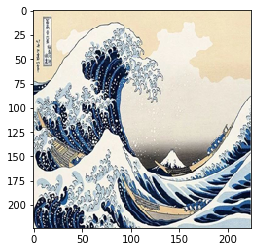

In [10]:
#print image
img_generator.show_image(style_path)

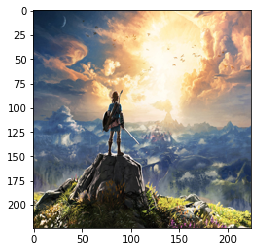

In [11]:
img_generator.show_image(content_path)

### Step 3: Generate outputs

In [12]:
sav_dir = 'outputs/'

In [13]:
#img_generator.reinialize_weights()

img_generator.model_nn(content_path, style_path, sav_dir, num_iterations = 2000,
                       noise_ratio=0.2, alpha=10, beta= 1000)

[0.2, 0.2, 0.2, 0.2, 0.2]
Iteration 0 :
total cost = 1176064.9
content cost = 5.688139
style cost = 1176.008
Iteration 10 :
total cost = 120232.664
content cost = 7.344847
style cost = 120.15922
Iteration 20 :
total cost = 78946.336
content cost = 8.429155
style cost = 78.862045
Iteration 30 :
total cost = 62504.664
content cost = 8.973263
style cost = 62.41493
Iteration 40 :
total cost = 52652.355
content cost = 9.341039
style cost = 52.558945
Iteration 50 :
total cost = 45842.633
content cost = 9.627572
style cost = 45.746357
Iteration 60 :
total cost = 40747.793
content cost = 9.856408
style cost = 40.64923
Iteration 70 :
total cost = 36733.1
content cost = 10.042022
style cost = 36.63268
Iteration 80 :
total cost = 33486.277
content cost = 10.198824
style cost = 33.38429
Iteration 90 :
total cost = 30819.518
content cost = 10.33332
style cost = 30.716183
Iteration 100 :
total cost = 28577.168
content cost = 10.449698
style cost = 28.472672
Iteration 110 :
total cost = 26684.322
con

### Step 4: Xception model (optional)

In [ ]:
inception_model =  tf.keras.applications.Xception(include_top = False, weights = 'imagenet', input_shape = (299,299,3))
img_generator = neural_transfer(inception_model)

style_layers = ['block2_sepconv1',
                'block3_sepconv1',
                'block4_sepconv1',
                'block5_sepconv1',
                'block5_sepconv1',
                'block6_sepconv1',
                'block7_sepconv1',
                'block8_sepconv1',
                'block9_sepconv1',
                'block10_sepconv1'
                ]
content_layer = 'block4_sepconv1'
img_generator.get_img_encoder(content_layer, style_layers)

opt = tf.optimizers.SGD(learning_rate = 0.0001)
img_generator.set_opt(opt)

img_generator.model_nn(content_path, style_path, sav_dir,start=0,num_iterations=2000,
                       noise_ratio=0.2, alpha=10, beta= 50000000)


### Step 5: ResNet50 model (optional)

In [ ]:
img_model =  tf.keras.applications.ResNet50V2(include_top = False, weights = 'imagenet', input_shape = (299,299,3))
img_generator = neural_transfer(img_model)

style_layers = ['conv2_block1_3_conv',
                'conv2_block2_1_conv',
                'conv2_block2_2_conv',
                'conv2_block3_2_conv',
                'conv2_block3_3_conv'
                ]
content_layer = 'conv4_block4_3_conv'
img_generator.get_img_encoder(content_layer, style_layers)

opt = tf.optimizers.SGD(learning_rate = 0.001)
img_generator.set_opt(opt)

img_generator.model_nn(content_path, style_path, sav_dir, num_iterations=2000,
                       noise_ratio=0.2, alpha=10, beta= 5000000)
